In [71]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [72]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [73]:
flights['day'] = '01'
flights['year'] = flights['year'].astype(str)
flights['date'] = flights[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1)

In [74]:
flights.head()

,year,month,passengers,day,date
0,1949,January,112,01,1949-January-01
1,1949,February,118,01,1949-February-01
2,1949,March,132,01,1949-March-01
3,1949,April,129,01,1949-April-01
4,1949,May,121,01,1949-May-01


In [75]:
flights = flights.set_index( pd.to_datetime( flights['date']) )
flights = flights.drop(['year', 'month', 'day',  'date'], axis=1)
flights.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


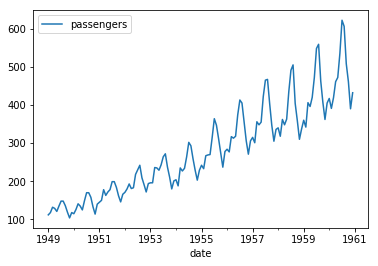

In [76]:
_ = flights.plot()

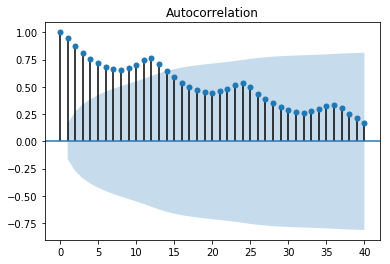

In [78]:
plot_acf(flights, alpha=0.05, lags=40)
plt.show()

### Discussion

- trend can be seen by decreasing correlations
- seasonal cycle can be seen by dips

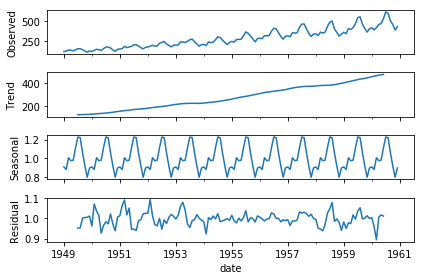

In [80]:
decomposition = sm.tsa.seasonal_decompose(flights, model='multiplicative')
fig = decomposition.plot()
plt.show()